# About
This notebook is one of the artifact for the Data Science Retail Case Studies.

The most updated version of this notebook can be downloaded from:
https://github.com/kanechew/Data-Science-Retail

# Instructions
This notebook will open the CSV file('transaction_records_2016.csv') that is generated by the python program. 

This notebook will create a new SQLite file('transactions.sqlite') that can be opened by various software programs.

# Import Python Libraries

In [30]:
import csv 
import pandas as pd
import time

# Import Raw Data (from CSV)

In [3]:
# Open CSV File
with open('transaction_records_2016.csv') as csvfile:
    # import data into a list 
    transaction_list = list(csv.DictReader(csvfile))

# Show first few rows of data
transaction_list[:10]

[{'date': '12/14/2016', 'location': 'IN', 'no': '1'},
 {'date': '10/13/2016', 'location': 'FL', 'no': '2'},
 {'date': '09/07/2016', 'location': 'FL', 'no': '3'},
 {'date': '09/13/2016', 'location': 'FL', 'no': '4'},
 {'date': '11/17/2016', 'location': 'IN', 'no': '5'},
 {'date': '10/02/2016', 'location': 'FL', 'no': '6'},
 {'date': '09/06/2016', 'location': 'FL', 'no': '7'},
 {'date': '09/02/2016', 'location': 'IN', 'no': '8'},
 {'date': '12/26/2016', 'location': 'FL', 'no': '9'},
 {'date': '12/04/2016', 'location': 'FL', 'no': '10'}]

# Validate Data

In [4]:
print(len(transaction_list)) # Check length
print(transaction_list[0].keys()) # Check headers

# Check empty values
for i in range(len(transaction_list)):
    if '' in transaction_list[i].itervalues():
        print('row %d is empty' %(i))

100
['date', 'location', 'no']


# Convert Data (into DataFrame)

In [6]:
df = pd.DataFrame()

for d in transaction_list:
    df = df.append(d,ignore_index=True)

del df['no']    
df.head()


,date,location
0,12/14/2016,IN
1,10/13/2016,FL
2,09/07/2016,FL
3,09/13/2016,FL
4,11/17/2016,IN


# Inspect Data

In [7]:
# Sum up sales in different locations
locations = df.groupby('location').count()
print(locations.head())

# Sum up sales in different dates
dates = df.groupby('date').count()
print(dates.head())

# sum1 = df.groupby('location').count() # new dataframe
# type(sum1.sum(axis = 1))


          date
location      
FL          45
IN          55
            location
date                
01/10/2016         1
01/26/2016         1
02/01/2016         1
02/05/2016         2
02/06/2016         1


# Data Visualization

In [8]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt

## Scatterplot

In [77]:
#add a new column to encode location
def label_race (row):
    if row['location'] == 'FL' :
        return 1;
    if row['location'] == 'IN' :
        return 2;
    else:
        return 0;
 

df['location_code'] = df.apply (lambda row: label_race (row),axis=1)
location_code_count = len(pd.value_counts(df['location_code']))

# set the locations and labels of the yticks
locations_list = list(locations.index)

['FL', 'IN']

In [39]:
from datetime import datetime

date_objects = [datetime.strptime(date, '%m/%d/%Y').date() for date in df['date'].values]

<IPython.core.display.Javascript object>


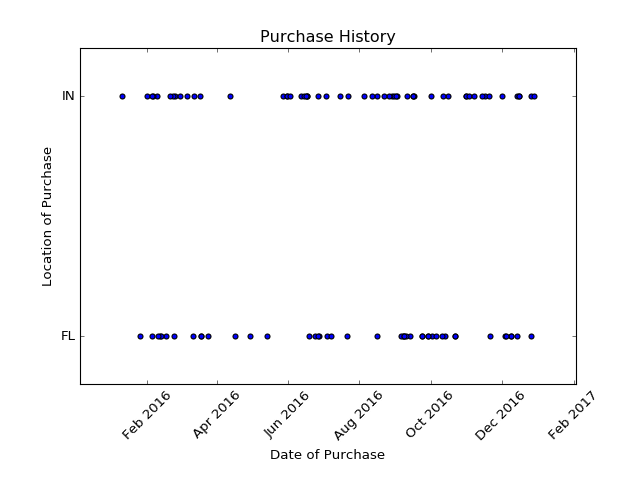

In [78]:
plt.figure()
# add a label to the x axis
plt.xlabel('Date of Purchase')
# add a label to the y axis
plt.ylabel('Location of Purchase')
# add a title
plt.title('Purchase History')
plt.scatter(date_objects, df['location_code'])
plt.yticks(range(1,location_code_count+1), locations_list)

# gca() get the current axes instance
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.2)

plt.show()

## Bar Chart

In [9]:
locations_list = list(locations.index) #list of index names
sales = list()

maxValue = 0
for i in range(len(locations)):
    if locations.iloc[i].iloc[0] > maxValue: maxValue = locations.iloc[i].iloc[0]
    sales.append(locations.iloc[i].iloc[0]) # use append


<IPython.core.display.Javascript object>


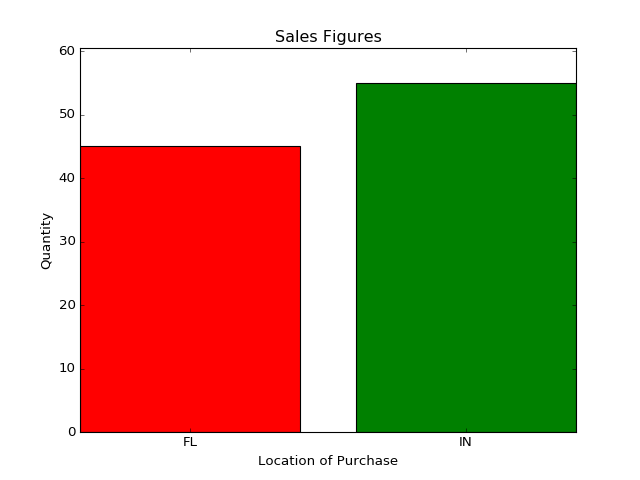

([<matplotlib.axis.XTick at 0x996eeb8>, <matplotlib.axis.XTick at 0x99e4198>],
 <a list of 2 Text xticklabel objects>)

In [10]:
plt.figure()
plt.xlabel('Location of Purchase')
# add a label to the y axis
plt.ylabel('Quantity')
# add a title
plt.title('Sales Figures')
# colors
my_colors = 'rgbymc'  #red, green, blue, yellow
# plot values
plt.bar(range(len(sales)), sales, align='center', color= my_colors)
plt.ylim(ymax = maxValue*1.1, ymin = 0)
plt.xticks(range(len(sales)), locations_list)

# Storing Data into Relational Database (SQLITE)

In [110]:
import sqlite3

conn = sqlite3.connect('transactions.sqlite')
cur = conn.cursor()

# Initial setup
cur.executescript('''
    DROP TABLE IF EXISTS Records;

    CREATE TABLE Records (
        "index"  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
        date   TEXT,
        location TEXT,
        location_code INTEGER)
''')

df.to_sql("Records", conn, if_exists="append")

# Save (commit) the changes
conn.commit()

# Close connection 
conn.close()

# Use DB Browser for SQLite to open the database file